In [2]:
from matplotlib import pyplot as plt
import pickle
import os
from pathlib import Path
import numpy as np

def moving_average(values, n):
    offset = (n - 1) // 2
    v = [values[0]] * offset + values + [values[-1]] * offset
    return [sum(v[i - offset : i + offset + 1]) / n for i in range(offset, len(v) - offset)]

def only_rewards(path):
    Y_LABELS = (
        "Average of rewards per episode",
        "Total of rewards per episode",
    )

    with open(path, "rb") as file:
        data = pickle.load(file)

    iterations = list(map(range, map(len, data[:-1])))

    fig, axis = plt.subplots(2, 1, figsize=(16, 10))
    successes = data[-1]

    for i, it in enumerate((1, 4)):
        axis[i].plot(iterations[it][4:], data[it][4:])
        axis[i].plot(iterations[it][4:], moving_average(data[it][4:], 100))
    for label, axis in zip(Y_LABELS, axis):
        axis.set_ylabel(label)
    fig.suptitle(f"Episode | Total of successes = {successes}")
    fig.tight_layout()
    
def load_save_result(path, title="", scale_factor=1):
    from matplotlib import pyplot as plt

    Y_LABELS = (
        "Loss per optimization",
        "Average of rewards per episode",
        "Average of max predicted Q value",
        "Rewards per action",
        "Total of rewards per episode",
        "Weighted Total of max predicted Q value",
    )

    with open(path, "rb") as file:
        data = pickle.load(file)

    iterations = list(map(range, map(len, data[:-1])))

    for i in range(len(Y_LABELS)):
        plt.figure(figsize=(6, 6)) 
        if i == 1:
            plt.plot(iterations[i + 3][4:], np.array(data[i + 3][4:]), label=Y_LABELS[i + 3], linewidth = 0.5, color="grey")
            plt.plot(iterations[i][4:], data[i][4:], label=Y_LABELS[i], linewidth = 0.5, color="teal")
        elif i == 2:
            plt.plot(iterations[i + 3][4:], len(data[i + 3][4:]) * np.array(data[i + 3][4:]) / scale_factor, label=Y_LABELS[i + 3], linewidth = 0.5, color="grey")
            plt.plot(iterations[i][4:], data[i][4:], label=Y_LABELS[i], linewidth = 0.5, color="teal")
        else:
            continue
            #plt.plot(iterations[i], data[i])
            
        plt.xlabel('Episode') 
        plt.title(title)
        plt.legend()
        plt.savefig(Path(os.getcwd()) / "graphs" / f"{title}-{Y_LABELS[i]}")
        plt.show()
        

def comparison_graph(path_list, labels=['line'] * 8, smoothing=40):
        
    colors = ['springgreen', 'darkgreen', 'lightsalmon', 'tomato', 'powderblue', 'cadetblue', 'gainsboro', 'slategray']
    data = []
    indexes = []
    
    for path in path_list:
        with open(path, "rb") as file:
            d = pickle.load(file)
            data.append(d[1][4:])
            indexes.append(range(len(d[4][4:])))
    
    plt.figure(figsize=(16, 5)) 
    plt.title("Rewards over Episodes")
    plt.ylabel(f'Log Reward (smoothing over {smoothing} games)') 
    plt.xlabel('Episode') 
    
    for i in range(len(data)):
        plt.plot(indexes[i], data[i], label = labels[2 * i], linestyle="-", color=colors[2 * i], linewidth = 0.5)
        plt.plot(indexes[i], moving_average(data[i], smoothing), label = labels[2 * i + 1], linestyle="-", color=colors[2 * i + 1])

    plt.legend()
    plt.show()

In [3]:


def get_path(folder, ep):
    path = Path(os.getcwd()) / "results" / folder / "recorded-data" / f"episode-{ep}.pkl"
    return path

def get_path_custom(folder, ep):
    path = Path(os.getcwd()) / folder / "recorded-data" / f"episode-{ep}.pkl"
    return path

<Figure size 600x600 with 0 Axes>

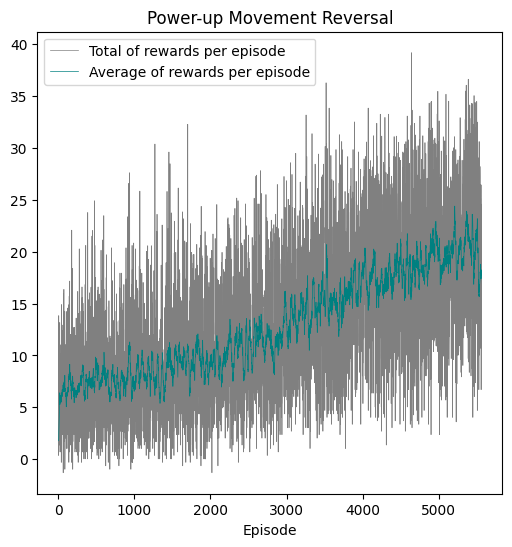

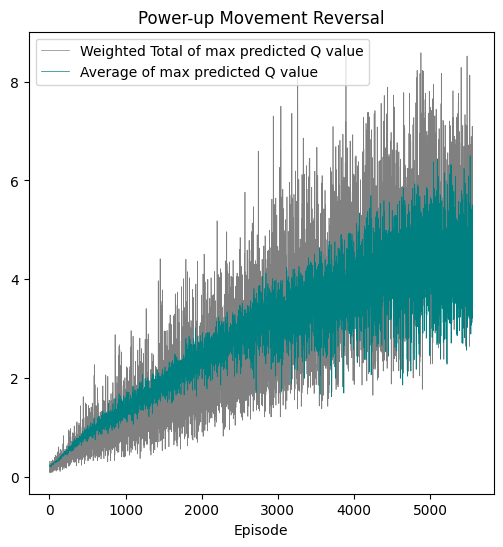

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

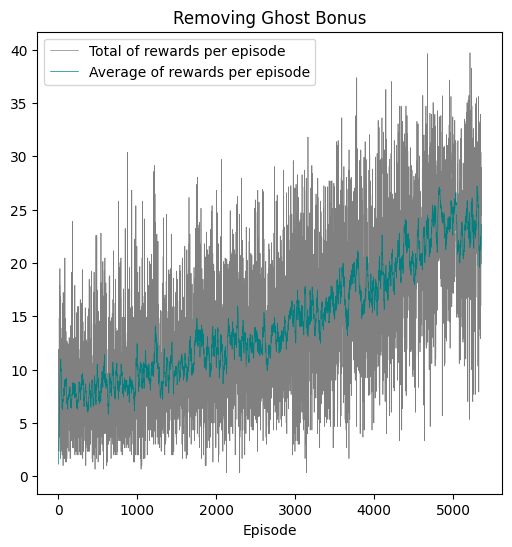

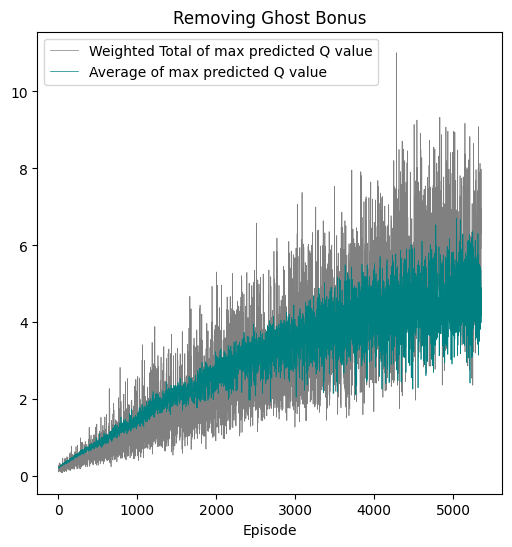

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

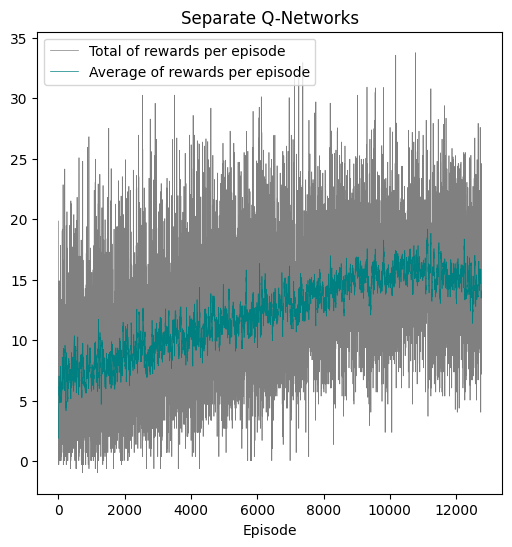

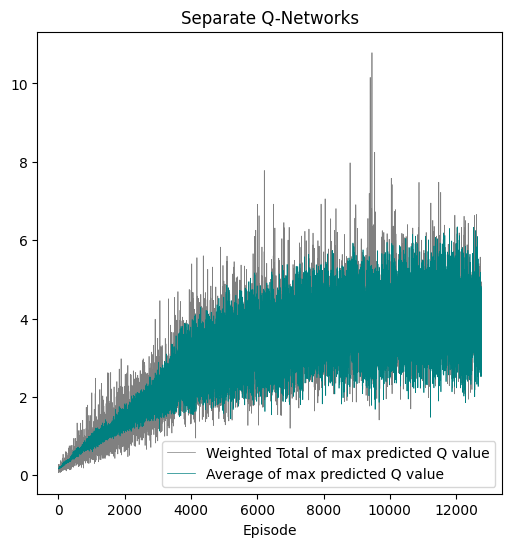

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

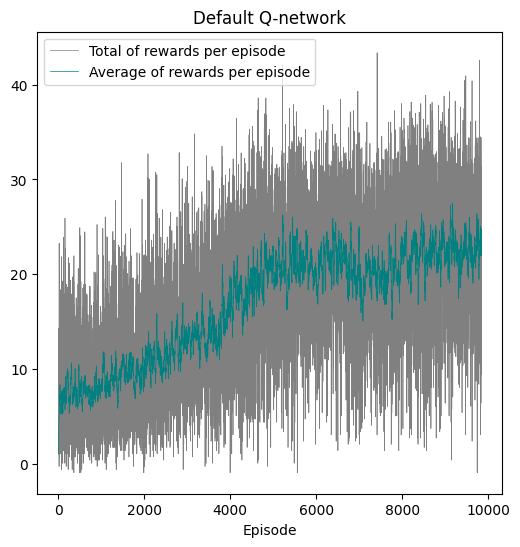

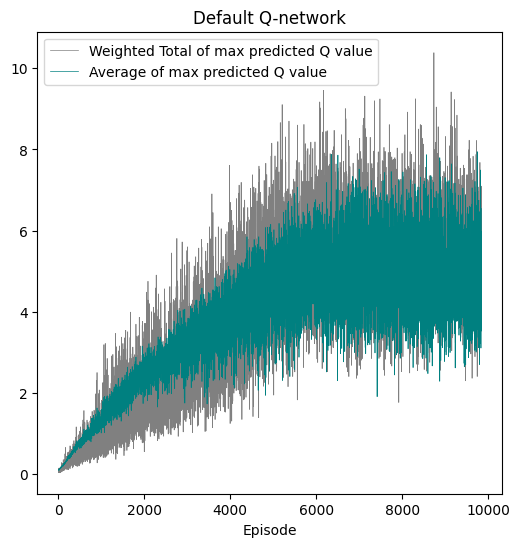

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [4]:
# The OG graph
ghostrevpath = get_path_custom("5.5k-ghostrev", 5560)
ghostbonuspath = get_path_custom("5300-noghostbonus", 5360)
switchpath = get_path_custom("DOUBLE13000", 12760)
regpath = get_path_custom("DQN-REG 9840", 9840)

load_save_result(ghostrevpath, 'Power-up Movement Reversal', scale_factor=2_000_000)
load_save_result(ghostbonuspath, 'Removing Ghost Bonus', scale_factor=2_000_000)
load_save_result(switchpath,'Separate Q-Networks', scale_factor=4_000_000)
load_save_result(regpath, 'Default Q-network', scale_factor=4_000_000)

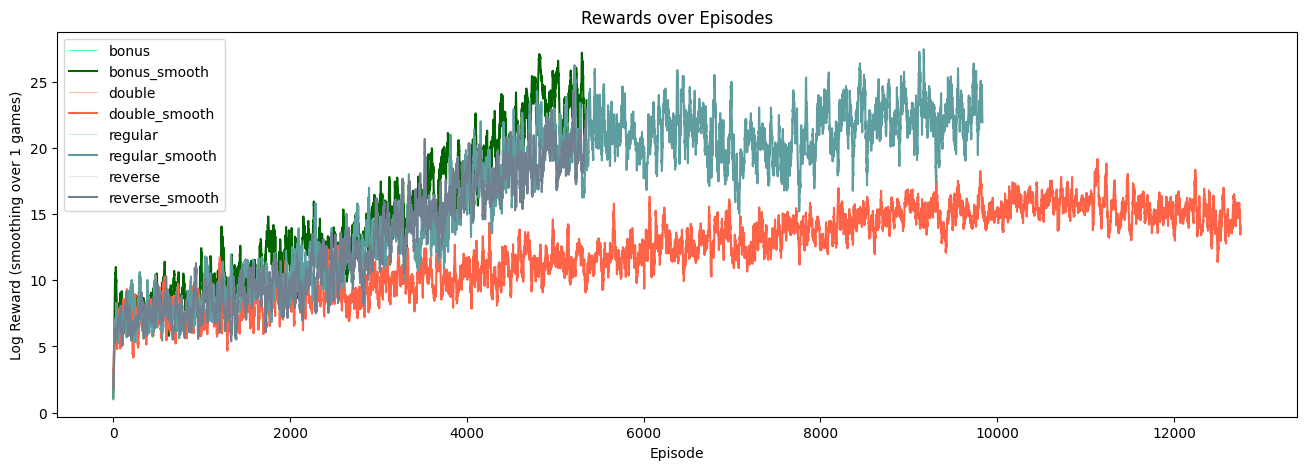

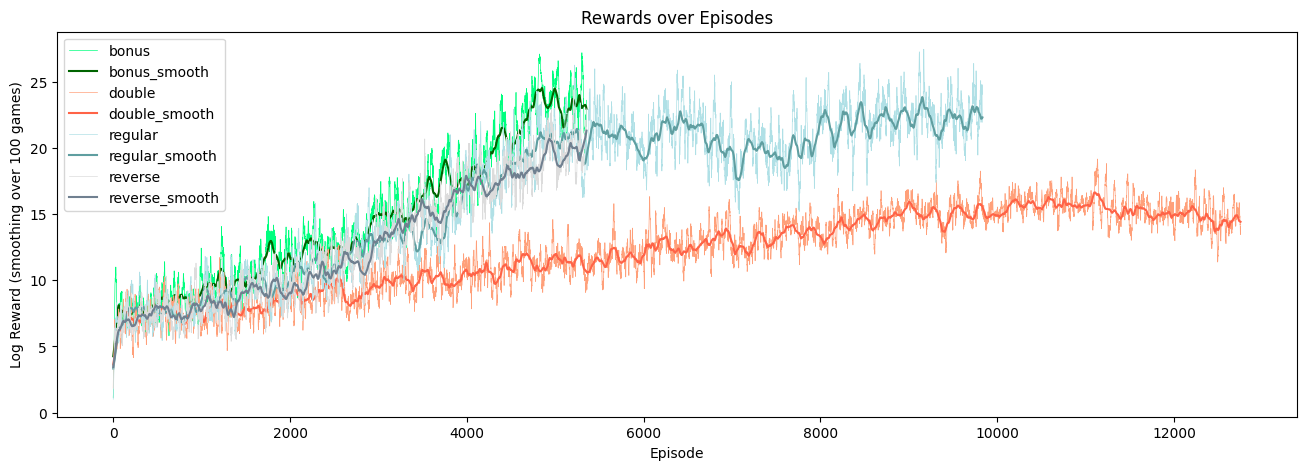

In [5]:
# My comparison graph
ghostrevpath = get_path_custom("5.5k-ghostrev", 5360)
ghostbonuspath = get_path_custom("5300-noghostbonus", 5360)
switchpath = get_path_custom("DOUBLE13000", 12760)
regpath = get_path_custom("DQN-REG 9840", 9840)

path_list = [ghostbonuspath, switchpath, regpath, ghostrevpath ]
comparison_graph(path_list,
                 labels=["bonus", "bonus_smooth", 
                         "double", "double_smooth", 
                         "regular", "regular_smooth", 
                         "reverse", "reverse_smooth"],
                 smoothing = 1)

comparison_graph(path_list,
                 labels=["bonus", "bonus_smooth", 
                         "double", "double_smooth", 
                         "regular", "regular_smooth", 
                         "reverse", "reverse_smooth"],
                 smoothing = 100)

In [6]:

from sklearn.linear_model import LinearRegression

ghostrevpath = get_path_custom("5.5k-ghostrev", 1000)
regpath = get_path_custom("DQN-REG 9840", 1000)

pl = [regpath, ghostrevpath]

def get_data(path_list):
        
    data = []
    indexes = []
    
    for path in path_list:
        with open(path, "rb") as file:
            d = pickle.load(file)
            data.append(d[1][4:])
            indexes.append(range(len(d[4][4:])))
    
    return data, indexes
    
data, indexes = get_data(pl)

regression_regular = LinearRegression().fit([[x] for x in data[0]], indexes[0])
regression_reverse = LinearRegression().fit([[x] for x in data[1]], indexes[1])

print(regression_regular.coef_)
print(regression_reverse.coef_)

print(regression_regular.score([[x] for x in data[0]], indexes[0]))
print(regression_reverse.score([[x] for x in data[1]], indexes[1]))


[54.27367608]
[99.60520213]
0.04849695837151158
0.16175481732002805


In [7]:
import torch, random
from utils import ACTIONS
from deep_Q_network import *
from matplotlib import pyplot as plt
import pickle
import os
from pathlib import Path
import numpy as np

def get_path_custom_model(folder, ep):
    path = Path(os.getcwd()) / folder / "models" / f"policy-model-{ep}.pt"
    return path

def record(path_model):
    import cv2

    # Set environment
    ale = ALEInterface()
    ale.loadROM(Pacman)
    env = gym.make("ALE/MsPacman-v5")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    agent = DQN(N_ACTIONS).to(device)
    agent.load_state_dict(torch.load(str(path_model), map_location=device))
    agent.eval()

    dmaker = DecisionMaker(0, agent)
    obs = env.reset()

    frameSize = (160, 210)
    path_video = Path(os.getcwd()) / "output_video.avi"
    bin_loader = cv2.VideoWriter_fourcc(*"DIVX")
    out = cv2.VideoWriter(str(path_video), bin_loader, 30, frameSize)

    # Avoid beginning steps of the game
    for i_step in range(AVOIDED_STEPS):
        obs, reward, done, info = env.step(3)

    observations = init_obs(env)
    obs, reward, done, info = env.step(3)
    out.write(cv2.cvtColor(obs, cv2.COLOR_RGB2BGR))
    old_action = 3

    while True:
        state = preprocess_observation(observations, obs)
        sample = random.random()
        eps_threshold = EPS_MIN
        with torch.no_grad():
            q_values = agent(state)
        if sample > eps_threshold:
            action = q_values.max(1)[1].view(1, 1)
        else:
            random_action = [[random.randrange(N_ACTIONS)]]
            action = torch.tensor(random_action, device=device, dtype=torch.long)
        # action = agent(state).max(1)[1].view(1, 1)

        action_ = ACTIONS[old_action][action.item()]
        obs, reward, done, info = env.step(action_)
        out.write(cv2.cvtColor(obs, cv2.COLOR_RGB2BGR))
        old_action = action_
        if done:
            break

    out.release()
    print('"output_video.avi" saved in')

In [ ]:
ghostbonuspath = get_path_custom_model("5300-noghostbonus", 5360)
record(ghostbonuspath)